In [1]:
# Ths Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 5GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

In [2]:
import matplotlib as mpl
import matplotlib.pyplot as plt
import numpy as np
import os
from datetime import datetime
import pandas as pd

mpl.rcParams['figure.figsize'] = (10, 8)
mpl.rcParams['axes.grid'] = False

In [7]:
def parse(x):
    return datetime.strptime(x,'%m/%d/%Y')

In [8]:
df=pd.read_csv('https://raw.githubusercontent.com/srivatsan88/YouTubeLI/master/dataset/electricity_consumption.csv',
              parse_dates=['Bill_Date'],date_parser=parse)

In [9]:
df.head()

,Bill_Date,On_peak,Off_peak,Usage_charge,Billed_amount,Billing_days
0,2016-01-01,365,1423.5,219.0,247.73,31
1,2016-02-01,292,1138.8,175.2,234.11,31
2,2016-03-01,130,507.0,78.0,123.85,29
3,2016-04-01,117,456.3,70.2,111.22,29
4,2016-05-01,136,530.4,81.6,118.37,29


**Setting the bill_date as index, Indexing the date column, can able to analysis, sub string search easily**

In [11]:
bill_df=df.set_index('Bill_Date')

In [12]:
bill_df.head()

,On_peak,Off_peak,Usage_charge,Billed_amount,Billing_days
Bill_Date,,,,,
2016-01-01,365,1423.5,219.0,247.73,31
2016-02-01,292,1138.8,175.2,234.11,31
2016-03-01,130,507.0,78.0,123.85,29
2016-04-01,117,456.3,70.2,111.22,29
2016-05-01,136,530.4,81.6,118.37,29


In [14]:
bill_18=bill_df['2016':'2018'][['Billed_amount']]

In [16]:
bill_18

,Billed_amount
Bill_Date,
2016-01-01,247.73
2016-02-01,234.11
2016-03-01,123.85
2016-04-01,111.22
2016-05-01,118.37
2016-06-01,77.81
2016-07-01,86.67
2016-08-01,122.40
2016-09-01,223.62


# Simple Moving average

**Simple moving average = (t + (t-1) + (t-2) + ... + (t-n)) / n**

In [17]:
bill_18['ma_roll3']=bill_18['Billed_amount'].rolling(window=3).mean().shift(1)

In [18]:
bill_18

,Billed_amount,ma_roll3
Bill_Date,,
2016-01-01,247.73,NaN
2016-02-01,234.11,NaN
2016-03-01,123.85,NaN
2016-04-01,111.22,201.896667
2016-05-01,118.37,156.393333
2016-06-01,77.81,117.813333
2016-07-01,86.67,102.466667
2016-08-01,122.40,94.283333
2016-09-01,223.62,95.626667


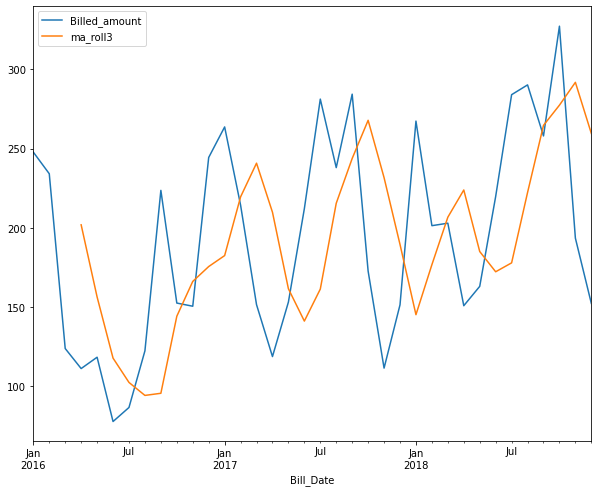

In [19]:
bill_18.plot()

**Although the moving average doesn't capture the exact pattern, it somewhat has the rise and fall of the data**

# Weighted moving average

In [20]:
def wma(weights):
    def calc(x):
        return (weights*x).mean()
    return calc

In [21]:
bill_18['wma_roll3']=bill_18['Billed_amount'].rolling(window=3).apply(wma(np.array([0.5,1,1.5]))).shift(1)

In [22]:
bill_18

,Billed_amount,ma_roll3,wma_roll3
Bill_Date,,,
2016-01-01,247.73,NaN,NaN
2016-02-01,234.11,NaN,NaN
2016-03-01,123.85,NaN,NaN
2016-04-01,111.22,201.896667,181.250000
2016-05-01,118.37,156.393333,135.911667
2016-06-01,77.81,117.813333,116.900000
2016-07-01,86.67,102.466667,96.898333
2016-08-01,122.40,94.283333,89.000000
2016-09-01,223.62,95.626667,103.058333


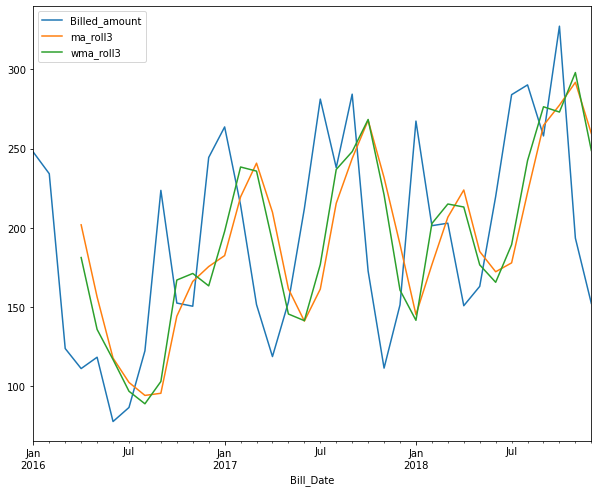

In [23]:
bill_18.plot()

# Exponential moving average

**Exponential moving average = (Close - previous EMA) * (2/(span+1)) + previous EMA**

**Where span is the time period**

In [24]:
bill_18['ema_win3']=bill_18['Billed_amount'].ewm(span=3,adjust=False,min_periods=0).mean().shift(1)

In [25]:
bill_18

,Billed_amount,ma_roll3,wma_roll3,ema_win3
Bill_Date,,,,
2016-01-01,247.73,NaN,NaN,NaN
2016-02-01,234.11,NaN,NaN,247.730000
2016-03-01,123.85,NaN,NaN,240.920000
2016-04-01,111.22,201.896667,181.250000,182.385000
2016-05-01,118.37,156.393333,135.911667,146.802500
2016-06-01,77.81,117.813333,116.900000,132.586250
2016-07-01,86.67,102.466667,96.898333,105.198125
2016-08-01,122.40,94.283333,89.000000,95.934063
2016-09-01,223.62,95.626667,103.058333,109.167031


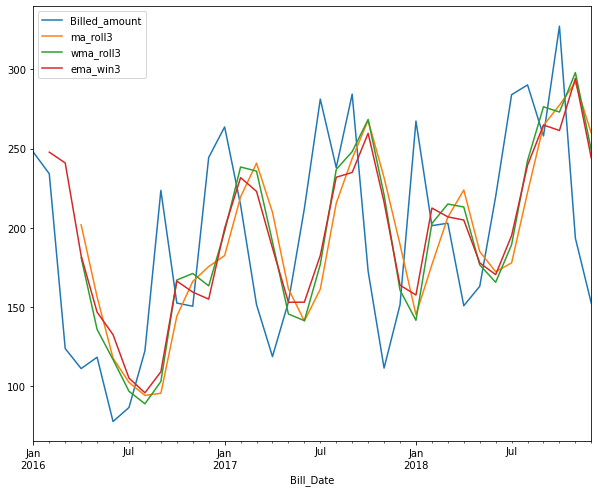

In [26]:
bill_18.plot()

# Exponential smoothing

In [27]:
bill_18['ews_alpha']=bill_18['Billed_amount'].ewm(alpha=0.7,adjust=False,min_periods=3).mean().shift(1)

In [28]:
bill_18

,Billed_amount,ma_roll3,wma_roll3,ema_win3,ews_alpha
Bill_Date,,,,,
2016-01-01,247.73,NaN,NaN,NaN,NaN
2016-02-01,234.11,NaN,NaN,247.730000,NaN
2016-03-01,123.85,NaN,NaN,240.920000,NaN
2016-04-01,111.22,201.896667,181.250000,182.385000,158.153800
2016-05-01,118.37,156.393333,135.911667,146.802500,125.300140
2016-06-01,77.81,117.813333,116.900000,132.586250,120.449042
2016-07-01,86.67,102.466667,96.898333,105.198125,90.601713
2016-08-01,122.40,94.283333,89.000000,95.934063,87.849514
2016-09-01,223.62,95.626667,103.058333,109.167031,112.034854


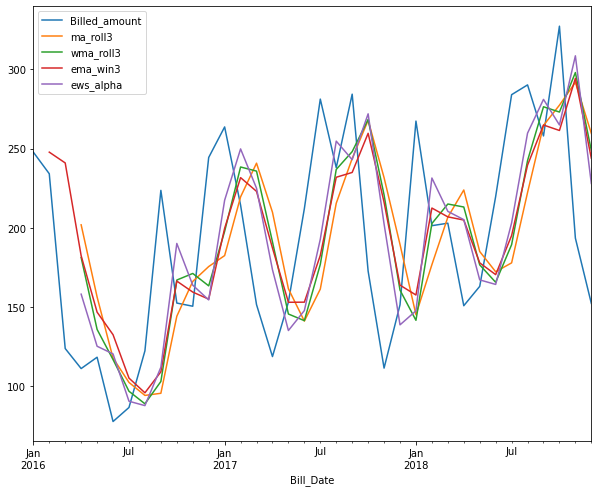

In [29]:
bill_18.plot()

In [30]:
bill_18['ews_alpha_3']=bill_18['Billed_amount'].ewm(alpha=0.3,adjust=False,min_periods=3).mean().shift(1)

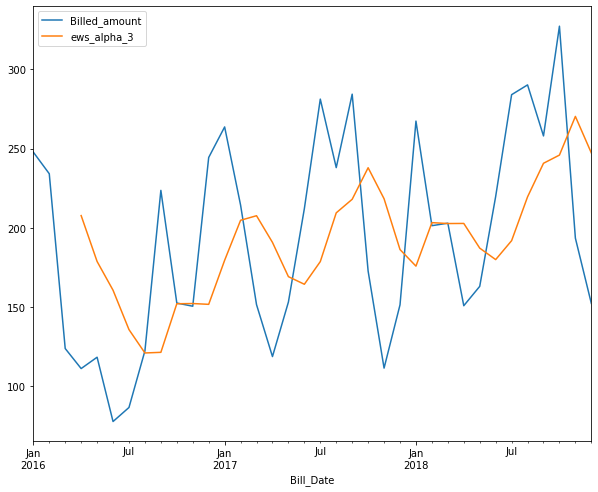

In [33]:
bill_18[['Billed_amount','ews_alpha_3']].plot()

**Lowereing the alpha value smoothes the value of the data**

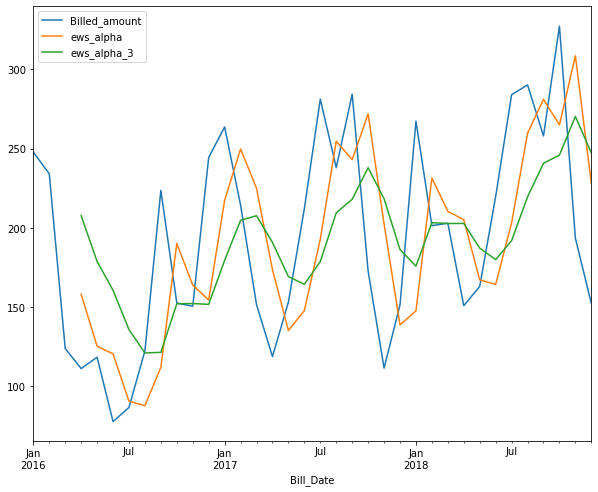

In [34]:
bill_18[['Billed_amount','ews_alpha','ews_alpha_3']].plot()

# Root Mean square error 

**Used to evaluate the performance of each Moving average techniques**

**Square root(E (y-yi)^2/n))**

In [35]:
((bill_18['Billed_amount']-bill_18['ma_roll3'])**2).mean()**0.5

70.98561687433802

In [37]:
((bill_18['Billed_amount']-bill_18['wma_roll3'])**2).mean()**0.5

65.82572602256133

In [41]:
((bill_18['Billed_amount']-bill_18['ema_win3'])**2).mean()**0.5

64.32131239414655

In [42]:
((bill_18['Billed_amount']-bill_18['ews_alpha'])**2).mean()**0.5

61.26408398853503

In [43]:
((bill_18['Billed_amount']-bill_18['ews_alpha_3'])**2).mean()**0.5

65.22424423118377

**Lower value of RMSE indicates the better fit of the values**

**So the exponential weighting average of alpha value with 0.7 is the better fit**